<a href="https://colab.research.google.com/github/qwebasilio/CPE019/blob/main/Hands_on_Activity_6_2_Training_Neural_Networks_Basilio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [3]:

filepath = "/content/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [4]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
377,1,87,60,37,75,37.2,0.509,22,0
174,2,75,64,24,55,29.7,0.370,33,0
51,1,101,50,15,36,24.2,0.526,26,0
367,0,101,64,17,0,21.0,0.252,21,0
403,9,72,78,25,0,31.6,0.280,38,0


In [5]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [6]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [8]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [9]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [10]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [11]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [12]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6298 - loss: 0.6582 - val_accuracy: 0.6562 - val_loss: 0.6763
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6473 - loss: 0.6478 - val_accuracy: 0.6615 - val_loss: 0.6705
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6470 - loss: 0.6527 - val_accuracy: 0.6667 - val_loss: 0.6650
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6291 - loss: 0.6586 - val_accuracy: 0.6719 - val_loss: 0.6596
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6626 - loss: 0.6212 - val_accuracy: 0.6667 - val_loss: 0.6545
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6408 - loss: 0.6416 - val_accuracy: 0.6719 - val_loss: 0.6496
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6558 - loss: 0.6394 - val_accuracy: 0.6719 - val_loss: 0.6449
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6229 - loss: 0.6365 - val_accuracy: 0.6

In [13]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = model.predict(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [14]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0.5994889 ],
       [0.8029956 ],
       [0.3362425 ],
       [0.29428667],
       [0.19494964],
       [0.43228304],
       [0.0704321 ],
       [0.38115865],
       [0.88147724],
       [0.13328938]], dtype=float32)

In [15]:
y_pred_prob_nn_1[:10]

array([[0.5994889 ],
       [0.8029956 ],
       [0.3362425 ],
       [0.29428667],
       [0.19494964],
       [0.43228304],
       [0.0704321 ],
       [0.38115865],
       [0.88147724],
       [0.13328938]], dtype=float32)

Create the plot_roc function

In [16]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.808


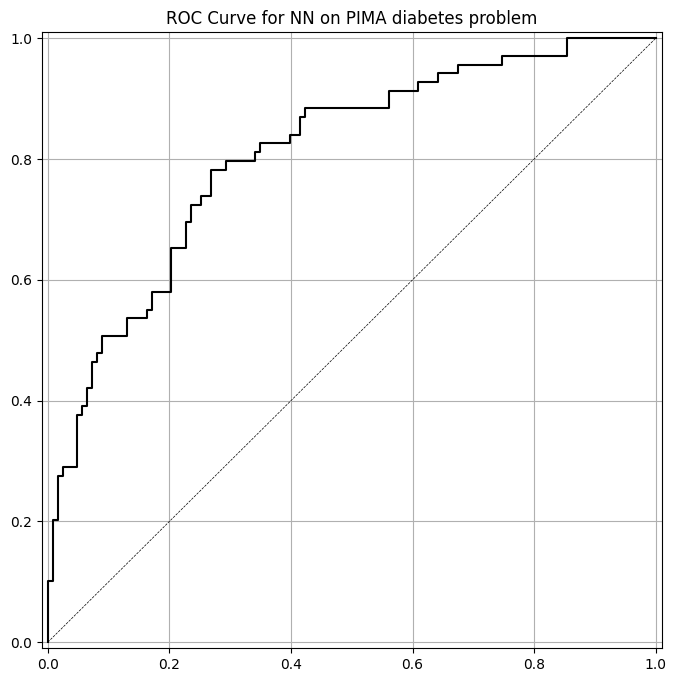

In [17]:
y_pred_class_nn_1 = np.where(y_pred_prob_nn_1 > .5, 1, 0)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [18]:
run_hist_1 = model.fit(X_train_norm, y_train,
                       validation_data=(X_test_norm, y_test),
                       epochs=200)

print(run_hist_1.history.keys())


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7763 - loss: 0.4600 - val_accuracy: 0.7500 - val_loss: 0.5019
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7766 - loss: 0.4687 - val_accuracy: 0.7500 - val_loss: 0.5019
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8062 - loss: 0.4413 - val_accuracy: 0.7500 - val_loss: 0.5018
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7866 - loss: 0.4501 - val_accuracy: 0.7500 - val_loss: 0.5018
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7616 - loss: 0.4845 - val_accuracy: 0.7500 - val_loss: 0.5018
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7602 - loss: 0.4802 - val_accuracy: 0.7500 - val_loss: 0.5018
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8085 - loss: 0.4278 - val_accuracy: 0.7500 - val_loss: 0.5017
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7475 - loss: 0.4801 - val_accuracy: 0.7500 - v

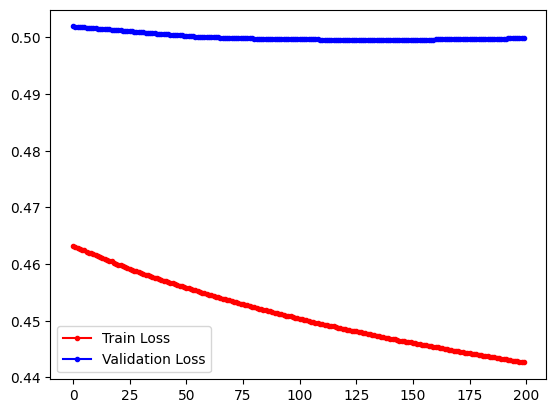

In [19]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

- The train loss and validation loss becomes lower with more iterations being done.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential([
    Dense(6, activation='relu', input_shape=(X_train_norm.shape[1],)),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=SGD(learning_rate=0.003), loss="binary_crossentropy", metrics=["accuracy"])

run_hist = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6747 - loss: 0.6300 - val_accuracy: 0.6719 - val_loss: 0.6361
Epoch 2/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6929 - loss: 0.6344 - val_accuracy: 0.6771 - val_loss: 0.6339
Epoch 3/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6945 - loss: 0.6223 - val_accuracy: 0.6823 - val_loss: 0.6318
Epoch 4/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6890 - loss: 0.6243 - val_accuracy: 0.6875 - val_loss: 0.6297
Epoch 5/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6957 - loss: 0.6179 - val_accuracy: 0.6927 - val_loss: 0.6277
Epoch 6/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6918 - loss: 0.6095 - val_accuracy: 0.6927 - val_loss: 0.6257
Epoch 7/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6925 - loss: 0.6175 - val_accuracy: 0.6927 - val_loss: 0.6237
Epoch 8/1500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7063 - loss: 0.6065 - val_accuracy: 0.6927 - val_l

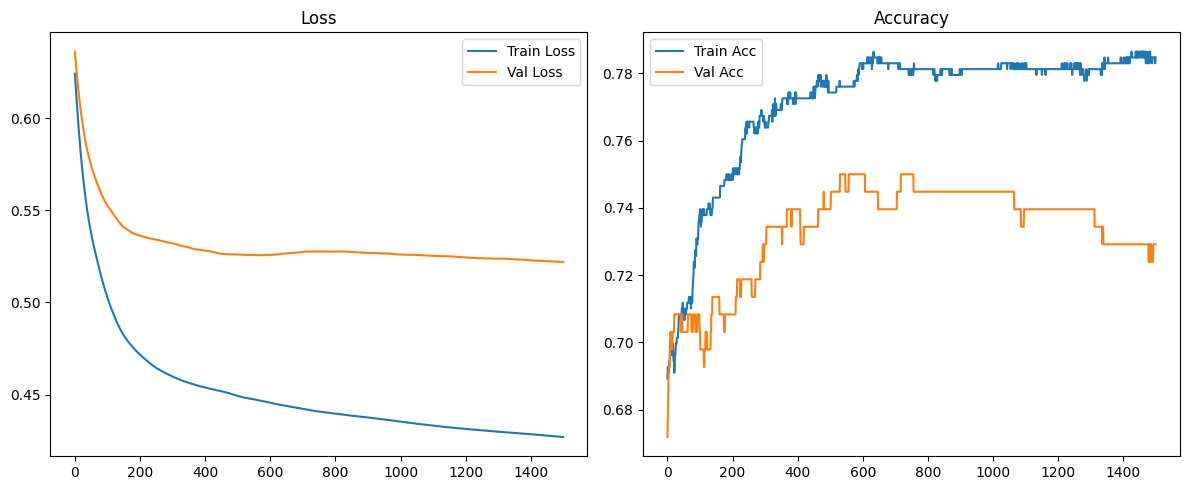

In [21]:
import matplotlib.pyplot as plt

loss = run_hist.history['loss']
val_loss = run_hist.history['val_loss']
acc = run_hist.history['accuracy']
val_acc = run_hist.history['val_accuracy']

epochs_range = range(1500)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Val Loss")
plt.title("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label="Train Acc")
plt.plot(epochs_range, val_acc, label="Val Acc")
plt.title("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


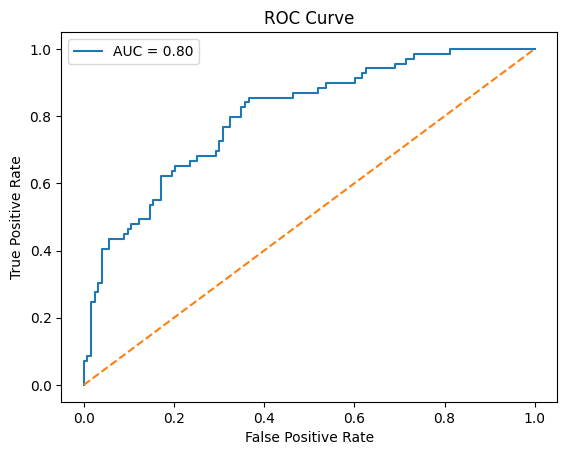

In [22]:
from sklearn.metrics import roc_curve, auc

y_pred_probs = model.predict(X_test_norm).flatten()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


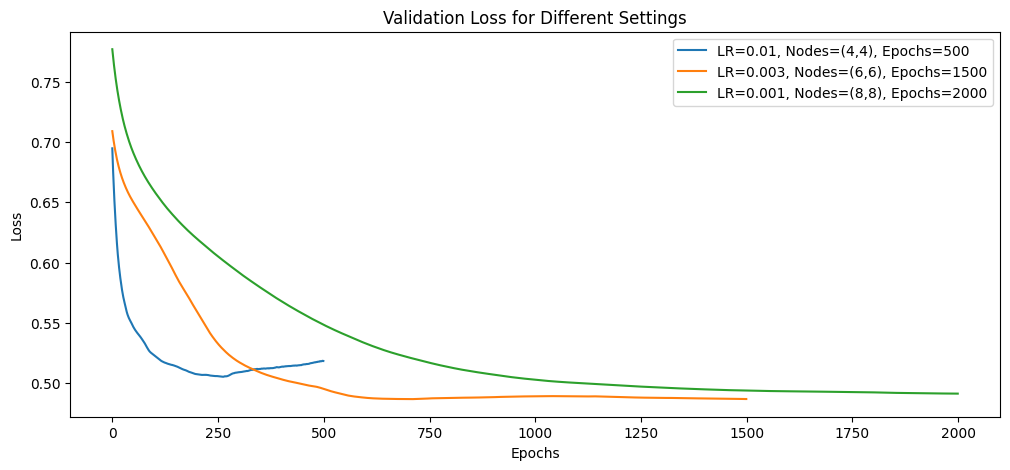

In [23]:
def build_and_train(lr, nodes_layer1, nodes_layer2, epochs):
    model = Sequential([
        Dense(nodes_layer1, activation='relu', input_shape=(X_train_norm.shape[1],)),
        Dense(nodes_layer2, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=SGD(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=epochs, verbose=0)

configs = [
    (0.01, 4, 4, 500),
    (0.003, 6, 6, 1500),
    (0.001, 8, 8, 2000),
]

plt.figure(figsize=(12, 5))
for lr, n1, n2, e in configs:
    hist = build_and_train(lr, n1, n2, e)
    plt.plot(hist.history['val_loss'], label=f"LR={lr}, Nodes=({n1},{n2}), Epochs={e}")

plt.title("Validation Loss for Different Settings")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

- The validation loss becomes less as there are more epochs. Although higher epochs can give better results, there comes a point that it almost flatlines and doesn't even reach 0.

### Conclusion

In this activity, I learned how changing the learning rate, number of training rounds, and the structure of the model can affect how well it learns. I saw that some settings helped the model do better on both training and test data, while others made it harder for the model to improve. By looking at the graphs of loss and accuracy, I was able to compare how each model performed and choose the one that gave the best results.